In [1]:
import lightkurve as lk 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pylab import *
import pandas as pd
import astropy.units as u
import math
import warnings
from IPython.display import Image
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)
import seaborn as sns
plt.rcParams['figure.dpi'] = 100

from astroquery.simbad import Simbad

from multiprocessing import Pool
from astroquery.simbad import Simbad
#import read_mist_models
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

import pandas as pd
from pandas import DataFrame
pd.options.display.max_columns = 500
pd.options.display.max_rows = None

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import cm
%matplotlib inline
#import smplotlib

#import read_mist_models
#import mesa_reader as mr

import astropy.units as u
import astropy.coordinates as coord
from astropy.table import Table

from astroquery.gaia import Gaia
from astroquery.simbad import Simbad
from astroquery.vizier import Vizier
import astroquery.gaia
Vizier.ROW_LIMIT=-1
vsearch = Vizier(columns=["+_r","**"])#,column_filters={'Gmag': '<11'}
import astroquery.gaia
import glob, itertools

import logging
import warnings
from gyrointerp import gyro_age_posterior

from gyrointerp import get_summary_statistics

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation
from scipy.stats import binned_statistic

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

from matplotlib.lines import Line2D
from PIL import Image, ImageDraw, ImageFont
import os
import math

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


Status messages could not be retrieved


In [2]:
os.chdir('/Users/mlclark/Library/CloudStorage/GoogleDrive-mclark.astro@gmail.com/My Drive/UMa/final_uma')

Rotation Plot - make sure to check file directories

In [31]:
rot_dir='rot_files'

In [3]:
def plot_colors(yval=-4.5, alpha=0.15, xmin=-0.5, xmax=3.5,fontsize=16):
    colors = [
        {"min": -3, "max": -0.26, "alpha": alpha, "color": '#5b7cff', "label": 'O'},
        {"min": -0.25, "max": -0.038, "alpha": alpha, "color": '#6988ff', "label": 'B'},
        {"min": -0.037, "max": 0.327, "alpha": alpha, "color": '#93aaff', "label": 'A'},
        {"min": 0.326, "max": 0.767, "alpha": alpha, "color": '#dddeff', "label": 'F'},
        {"min": 0.768, "max": 0.984, "alpha": alpha, "color": '#ffebdf', "label": 'G'},
        {"min": 0.983, "max": 1.85, "alpha": alpha, "color": '#ffb177', "label": 'K'},
        {"min": 1.85, "max": 7.0, "alpha": alpha, "color": '#ffa448', "label": 'M'}
    ]

    for c in colors:
        if c["min"] < xmax and c["max"] > xmin: # Check if the color is within xmin and xmax
            bprp1 = max(c["min"], xmin)
            bprp2 = min(c["max"], xmax)

            plt.axvspan(bprp1, bprp2, alpha=c["alpha"], color=c["color"], zorder=1)
            val = bprp1 + (bprp2 - bprp1) / 2
            plt.annotate(c["label"], xy=(val, yval), xytext=(val, yval), fontsize=fontsize,zorder=8)
    return


def median_fill_plot(color, rotation, cluster, linecol='royalblue', fillcol='tab:blue', alpha=0.3, bins=np.linspace(0,3.5,10)):  #color: i.e. dpres.bp_rp_corr, bins: i.e. np.linspace(0,3.5,10)
    med, bin_edges, _ = binned_statistic(color, rotation, statistic='median', bins=bins)
    bin_indices1 = np.digitize(color, bins)
    mad = []
    for i in range(1, len(bins)):
        y_in_bin1 = rotation[bin_indices1 == i]
        if len(y_in_bin1) > 0:
            mad.append(median_abs_deviation(y_in_bin1, scale='normal'))  # set scale='normal' for consistency with std
        else:
            mad.append(np.nan)
    med=np.nan_to_num(np.array(med), nan=0.0)
    mad=np.nan_to_num(np.array(mad), nan=0.0)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])


    x_smooth = np.linspace(bin_centers[0], bin_centers[-1], 100)  # More points for smoothness

    spline_median1 = make_interp_spline(bin_centers, med, k=3)
    spline_upper1 = make_interp_spline(bin_centers, med + mad, k=3)
    spline_lower1 = make_interp_spline(bin_centers, med - mad, k=3)
    med_plot = spline_median1(x_smooth)
    upper_plot = spline_upper1(x_smooth)
    lower_plot = spline_lower1(x_smooth)

    plt.plot(x_smooth, med_plot, color=linecol)
    plt.fill_between(x_smooth, lower_plot, upper_plot, color=fillcol, alpha=alpha, label=cluster)
    return 

In [32]:
dpleiades=pd.read_csv(os.path.join(rot_dir,'rebull2016_pleiades.csv'),comment='#')
dpleiades=dpleiades[(dpleiades.dd=='no')&(dpleiades.Mm=='best')&(dpleiades.ddm=='no')&(dpleiades.dScu=='no')&(dpleiades.RUWE<1.4)]
dpleiades=dpleiades[dpleiades.Prot>=0.2]
dpleiades['bp_rp_corr']=dpleiades['bp_rp']-dpleiades['E_BP-RP_']

In [33]:
dpres=pd.read_csv(os.path.join(rot_dir,'douglas2019_praesape.csv'))
dpres=dpres[(dpres.Prot>=0.2)&(dpres.RUWE<1.4)]
dpres['bp_rp_corr']=dpres['BP-RP']-dpres['E_BP-RP_']

In [35]:
duma=pd.read_csv(os.path.join(rot_dir,'25_6_17_final_updated_pers.csv'))
duma=duma[(duma.ruwe<1.4)&(duma.Median_Period>=0.2)]
dgyro=pd.read_csv(os.path.join(rot_dir,"25_6_17_final_gyro_interp_stars.csv"))
dgyro=dgyro[dgyro.Median_Period>=0.2]

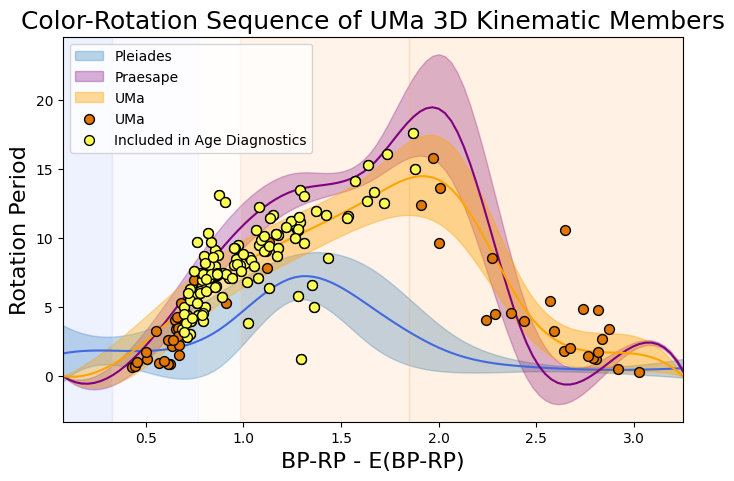

In [38]:
plt.figure(figsize=(8,5))
median_fill_plot(color=dpleiades.bp_rp_corr, rotation=dpleiades.Prot, cluster='Pleiades', bins=np.linspace(np.min(dpleiades.bp_rp_corr), np.max(dpleiades.bp_rp_corr), 10))
median_fill_plot(color=dpres.bp_rp_corr, rotation=dpres.Prot, linecol='purple', fillcol='purple', cluster="Praesape", bins=np.linspace(np.min(dpleiades.bp_rp_corr), np.max(dpleiades.bp_rp_corr), 10))
median_fill_plot(color=duma.bp_rp_corr, rotation=duma.Median_Period, linecol='orange', fillcol='orange', cluster="UMa", bins=np.linspace(np.min(dpleiades.bp_rp_corr), np.max(dpleiades.bp_rp_corr), 10), alpha=0.4)

plt.scatter(duma.bp_rp_corr, duma.Median_Period, color='xkcd:pumpkin', marker='o', s=50, edgecolors='k', label='UMa', zorder=100)
plt.scatter(dgyro.bp_rp_corr, dgyro.Median_Period, s=50, color='xkcd:lemon', marker='o', edgecolors='k', zorder=200, label='Included in Age Diagnostics')

plot_colors(xmin=0, xmax=3.5)

plt.xlabel('BP-RP - E(BP-RP)', fontsize=16)
plt.ylabel('Rotation Period',  fontsize=16)
bin_centers = 0.5 * (np.linspace(np.min(dpleiades.bp_rp_corr), np.max(dpleiades.bp_rp_corr), 10)[1:] + np.linspace(np.min(dpleiades.bp_rp_corr), np.max(dpleiades.bp_rp_corr), 10)[:-1])
plt.xlim(bin_centers[0], bin_centers[-1])
plt.title('Color-Rotation Sequence of UMa 3D Kinematic Members',  fontsize=18)
plt.legend(loc='upper left')
#plt.savefig('color_rotation_sequence.png')
plt.show()

In [39]:
posteriors=np.load(os.path.join(rot_dir,'25_6_17_age_posteriors_ruwe125.npy'))

In [42]:
def gauss(x,A, x0, sigma):
    return A * np.exp(-(x - x0)**2 / (2 * sigma**2))

def pdf_plots(posterior, age_grid, xmax, pdfproduct=True, norm=True): #number stars x age grid array, age grid, plotting x lim (array)
    fig, ax = plt.subplots()
    if norm:
        for i in range(len(posterior)-1):
            ax.plot(age_grid, posterior[i]/np.max(posterior[i]), c='k', lw=1, alpha=.2)
        ax.plot(age_grid, posterior[-1]/np.max(posterior[-1]), c='k', lw=1, alpha=.2, label='Individual PDF')
        if pdfproduct:
            resultprod1=np.prod(posterior[:61], axis=0) *1e180         
            resultprod2=np.prod(posterior[61:], axis=0) *1e180 
            normprod=resultprod2*resultprod1/np.max(resultprod2*resultprod1)         
            peakage=np.where(normprod==np.max(normprod))
            prob_age=age_grid[peakage[0][0]]
            xdata=age_grid[peakage[0][0]-20:peakage[0][0]+20]-int(prob_age)-2
            ydata=normprod[peakage[0][0]-20:peakage[0][0]+20]
            parameters, _ = curve_fit(gauss, xdata, ydata)
            amp, mean,  sigma= parameters
            fit_y = gauss(xdata, amp, mean,  sigma)
            ax.plot(xdata+int(prob_age)+2, fit_y, '-', color='blue', label=f"Joint PDF, Product: \n Most Probable Age\n = {round(mean+int(prob_age)+2)} $\pm$ {round(sigma)} Myr")

            #ax.plot(age_grid, normprod, c='mediumblue', label=f"Joint PDF, Product: \n Most Probable Age\n = {round(prob_age)} Myr", lw=2)

    else:
        for i in range(len(posterior)-1):
            ax.plot(age_grid, posterior[i], c='k', lw=1, alpha=.2)
        ax.plot(age_grid, posterior[-1], c='k', lw=1, alpha=.2, label='Individual PDF')


    ax.update({
        'xlabel': 'Age [Myr]',
        'ylabel': 'Probability',
        'xlim': [100,4000]
        })

    #plt.grid(alpha=0.25)
    plt.xlabel('Age (Myr)',fontsize=20)
    plt.ylabel('Normalized Probabilty', fontsize=20)
    plt.xlim(100,xmax)
    plt.title('UMa Gyrochronological Ages')
    plt.legend(facecolor='w',framealpha=1,fontsize=10, loc='lower right')
    plt.tight_layout()
    plt.show()

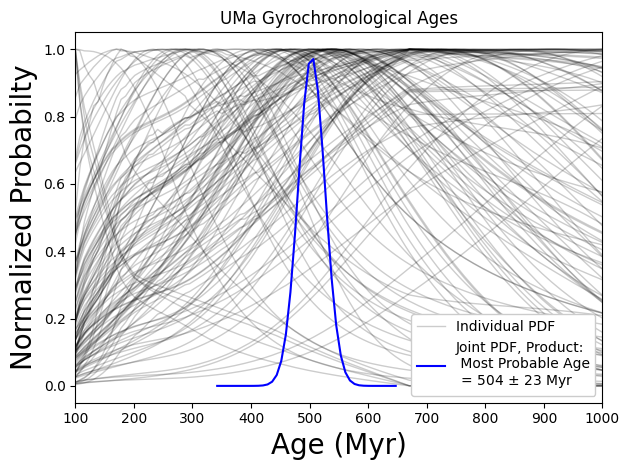

In [43]:
pdf_plots(posteriors, age_grid=np.linspace(100, 4000, 500), xmax=1000)

White Dwarf Plots

In [3]:
wd_dir='wdwarf_files'

In [4]:
uma_wd=pd.read_csv(os.path.join(wd_dir,'25_6_30_wds_w_ages.csv'))

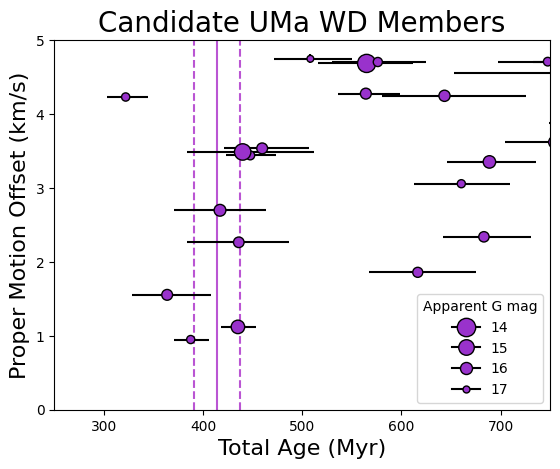

In [47]:
#y error bars on PM calculated using error propagation. Gaia is so precise we can't really see them!, x errors determined from wdwarfdate
plt.errorbar(uma_wd.total_age_median*1000, uma_wd['Voff(km/s)'], yerr=uma_wd.Voff_err, xerr=[1000*uma_wd.total_age_err_low, 1000*uma_wd.total_age_err_high], fmt='o', 
             ecolor='k', mec='purple', ms=0, mfc='purple', zorder=100) 
#size calculated this way so that points were distinguishable. if x axis is changed, you might see some that don't have markers anymore if they are fainter than 17.5 mag
plt.scatter(uma_wd.total_age_median*1000, uma_wd['Voff(km/s)'], edgecolors='k', s=50*(17.5-uma_wd.phot_g_mean_mag), c='darkorchid', zorder=200)

#displaying 14,15,16,and 17th mag, can be changed if wanted
legend_mags = [14, 15, 16, 17]
#calculate legend sizes to correspond with the marker sizes... if you change s=..., make sure to change this to be the same
legend_sizes = [50 * (17.5 - m) for m in legend_mags]
legend_labels = [f"{m}" for m in legend_mags]
#chatgpt told me this. it's what lets the legend have the various sizes
handles = [Line2D([0], [0], marker='o', markersize=np.sqrt(s), mec='k', linestyle='-',
                  markerfacecolor='darkorchid', label=label, color='k') 
           for s, label in zip(legend_sizes, legend_labels)]

plt.legend(handles=handles, title='Apparent G mag', loc='lower right', fontsize=10)
plt.xlim(.25*1000, .75*1000)
plt.ylim(0, 5)
#Jones+15 paper age estimate. keep or change to different ages, ie rot age estimate
plt.vlines([(.414-.023)*1000, (.414+.023)*1000], 0, 5, linestyle='dashed', colors='mediumorchid', zorder=0)
plt.vlines([.414*1000], 0, 5, linestyle='solid', colors='mediumorchid', zorder=0)
plt.title('Candidate UMa WD Members', fontsize=20)

plt.xlabel('Total Age (Myr)', fontsize=16)
plt.ylabel('Proper Motion Offset (km/s)', fontsize=16)
plt.show()

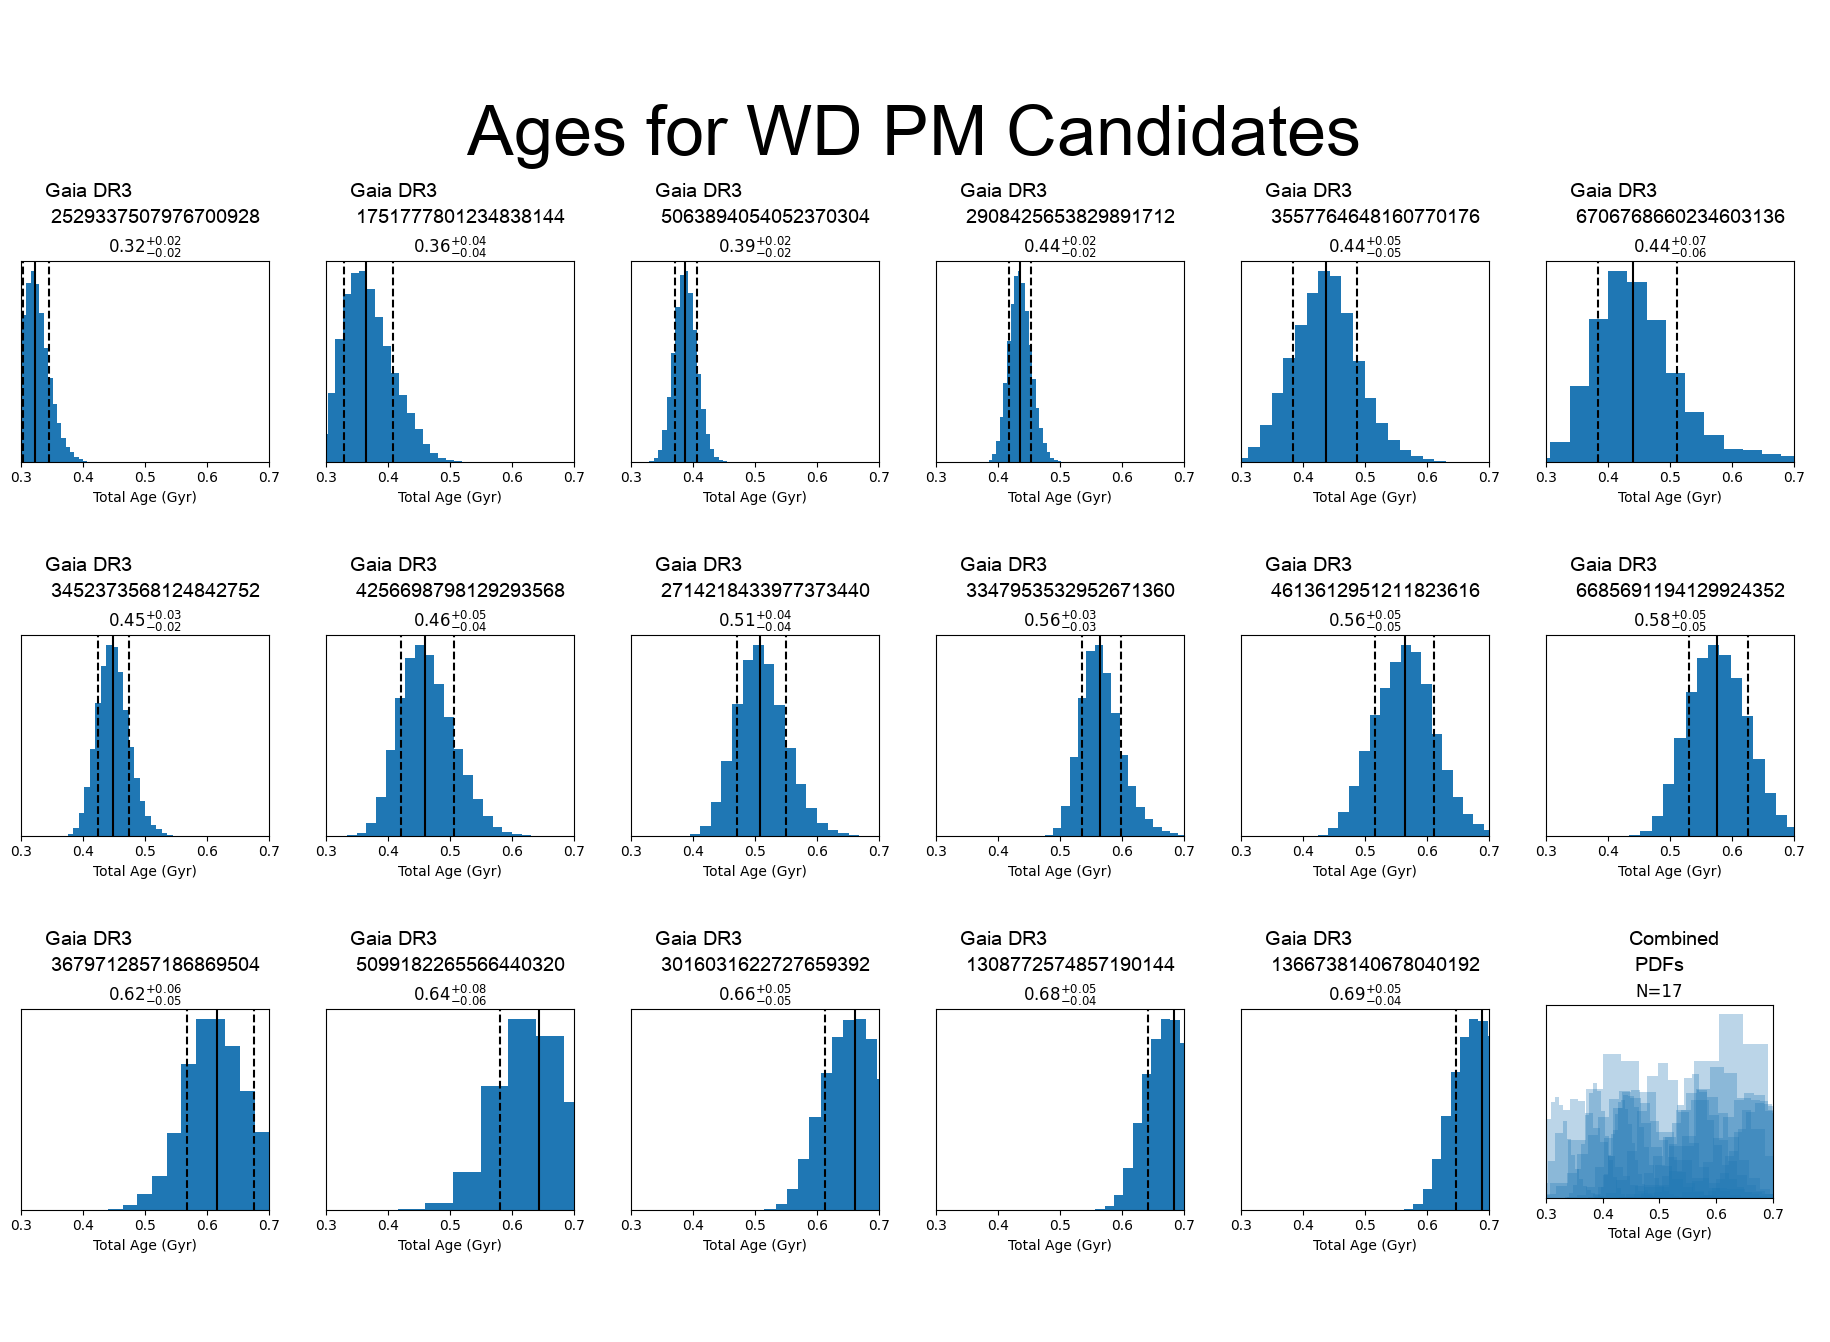

In [15]:
#this is what made my composite 6x3 image of the white dwarfs
image_folder = os.path.join(wd_dir, 'wd_images')
#^ files to run, ensure they're ordered by age, otherwise the GaiaIds below are in the wrong order. if any are removed or added, make sure to keep gaia ids in new order
gaias17=[2529337507976700928,
 1751777801234838144,
 5063894054052370304,
 2908425653829891712,
 3557764648160770176,
 6706768660234603136,
 3452373568124842752,
 4256698798129293568,
 2714218433977373440,
 3347953532952671360,
 4613612951211823616,
 6685691194129924352,
 3679712857186869504,
 5099182265566440320,
 3016031622727659392,
 1308772574857190144,
 1366738140678040192] #the 17 WD sources included in current image

#these are the parameters that worked best for me, can be played around with
title_text = "Ages for WD PM Candidates"
subtitle_font_size = 20 
title_font_size = 70  
title_margin = 80     
images_per_row = 6
rows=3
total_images = 18 #make sure this = length of folder. doesn't necessarily need to be images_per_row*rows, but if it's not then there will be blank spaces
row_spacing = 15


image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder)
               if f.lower().endswith(('.png', '.jpg', '.jpeg'))] #if you have a non-image file in there for some reason, it will ignore it
image_files = sorted(image_files)[:total_images] #makes sure you only have number of images that you specify above. 

images = [Image.open(img_path) for img_path in image_files]



widths, heights = zip(*(img.size for img in images)) #width and height of images, i made sure to crop them to the same size.. currently 290x290 pix
max_width = math.ceil(1.05*max(widths)) #slightly bigger so that there is more space for the labels
max_height = math.ceil(1.1*max(heights))

grid_width = images_per_row * max_width
grid_height = rows * max_height

#try to make it arial, otherwise let it do the default if you're getting issues i think
try:
    title_font = ImageFont.truetype("/Library/Fonts/Arial Unicode.ttf", size=title_font_size)
    subtitle_font = ImageFont.truetype("/Library/Fonts/Arial Unicode.ttf", size=subtitle_font_size)
except OSError:
    print("Error: 'arial.ttf' not found. Please ensure the font file is accessible.")
    # Fallback to default font if TrueType font cannot be loaded
    font = ImageFont.load_default()

#this is building the base image grid to include room for the title
dummy_img = Image.new('RGB', (100, 100))
draw1 = ImageDraw.Draw(dummy_img)
title_bbox = draw1.textbbox((0, 0), title_text, font=title_font)
title_width, title_height = title_bbox[2] - title_bbox[0], title_bbox[3] - title_bbox[1]
print(title_font)

final_img = Image.new('RGB', (grid_width, grid_height + title_height + title_margin * 4), color='white')
draw = ImageDraw.Draw(final_img)


title_x = (grid_width - title_width) // 2
title_y = title_margin
draw.text((title_x, title_y), title_text, fill='black', font=title_font)



image_index = 0
for row in range(1, rows+1):  # Start from row 1 to skip the title row
    for col in range(images_per_row):
        if image_index < total_images-1: #make sure you don't go over number of images, and leave the last one
            # Get the subtitle for the current image
            subtitle_text = f"Gaia DR3 \n {gaias17[image_index]}"
            subtitle_bbox = draw.textbbox((0, 0), subtitle_text, font=subtitle_font)
            subtitle_width, subtitle_height = subtitle_bbox[2] - subtitle_bbox[0], subtitle_bbox[3] - subtitle_bbox[1]

            # Calculate positions
            x = col * max_width
            y = (
                2*title_margin + title_height +
                (row - 1) * (max_height + subtitle_height + row_spacing)
            )            
            subtitle_x = (max_width - subtitle_width) // 2  # Center the subtitle above the image

            # Draw subtitle
            draw.text((x + subtitle_x, y - subtitle_height - 10), subtitle_text, fill='black', font=subtitle_font) #10 is a value I liked, can be changed to shift subtitle up or down
            # Paste image
            final_img.paste(images[image_index], (x, y)) #place image from folder in location with corresponding subtitle
            image_index += 1
        elif image_index < total_images:  #if it's the last one, but making sure you don't go over number of images
            # Get the subtitle for the current image
            subtitle_text = 'Combined \n PDFs' #this is the combined image, so no gaia id for it
            subtitle_bbox = draw.textbbox((0, 0), subtitle_text, font=subtitle_font)
            subtitle_width, subtitle_height = subtitle_bbox[2] - subtitle_bbox[0], subtitle_bbox[3] - subtitle_bbox[1]
             # Calculate positions
            x = col * max_width
            y = (
                2*title_margin + title_height +
                (row - 1) * (max_height + subtitle_height + row_spacing)
            )            
            subtitle_x = (max_width - subtitle_width) // 2  # Center the subtitle above the image

            # Draw subtitle
            draw.text((x + subtitle_x, y - subtitle_height - 10), subtitle_text, fill='black', font=subtitle_font)
            # Paste image
            final_img.paste(images[image_index], (x, y))
            image_index += 1

final_img

see WD notebook in WD folder if you need to make new wdwarfdate images (including the joint one) **TBD: Remember how to install git >_<**